# Homework 8

## Derek Anderson, Justin Dygert, Cameron Miller

### Question 1

In this exercise I want you to do a quick EDA on the Logan_housing.csv data set.  You can find the csv file in the HW8 folder on GitHub. The data are 4110 observations of Logan housing prices from 2018 to 2020. All the variable names are self explanatory except the DOM which stands for Days On the Market. The data was originally provided to the course by my former student, Jeffrey Brann! 

Show me what you have learned from the previous EDAs you did in HW2 and HW3. Try to come up with an interesting story (hypothesis) using this data set. For example, that would be interesting to see the breakdowns of Logan house prices by year, location etc. Treat this exercise as a real world project. Many times the managers have no idea what they want from the data!! your job is to be as creative as possible and come up with informative charts and tables. 

Import the Logan_housing.cvs as df. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')
rand_state = 1000

In [3]:
df = pd.read_csv("Logan_housing.csv")

df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

This next part is changing the variable types.

In [5]:
categorical = ['Garage Capacity', 'Irregular Shape', 'Quadrant', 'School District',
 'Sold Terms', 'Total Bedrooms','Total Bathrooms', 'month_sold', 'built_after_2000', 'Zip', 'year_sold']

for col in categorical: 
    df[col] = df[col].astype("category")

numerics = ['DOM', 'Sold Price', 'Total Square Feet', 'HOA Fee',  'Year Built']

for col in numerics:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   int64   
 1   DOM                4110 non-null   int64   
 2   Garage Capacity    4110 non-null   category
 3   HOA Fee            4110 non-null   int64   
 4   Irregular Shape    4110 non-null   category
 5   Quadrant           4110 non-null   category
 6   School District    4110 non-null   category
 7   Sold Terms         4110 non-null   category
 8   Total Bedrooms     4110 non-null   category
 9   Total Bathrooms    4110 non-null   category
 10  Total Square Feet  4110 non-null   int64   
 11  Year Built         4110 non-null   int64   
 12  Zip                4110 non-null   category
 13  year_sold          4110 non-null   category
 14  month_sold         4110 non-null   category
 15  built_after_2000   4110 non-null   category
dtypes: cat

his part is checking for NA's

In [7]:
df.isnull().sum()/len(df)*100

Sold Price           0.0
DOM                  0.0
Garage Capacity      0.0
HOA Fee              0.0
Irregular Shape      0.0
Quadrant             0.0
School District      0.0
Sold Terms           0.0
Total Bedrooms       0.0
Total Bathrooms      0.0
Total Square Feet    0.0
Year Built           0.0
Zip                  0.0
year_sold            0.0
month_sold           0.0
built_after_2000     0.0
dtype: float64

There are no NA values. We checked this before we got dummies so that we could see each variable.

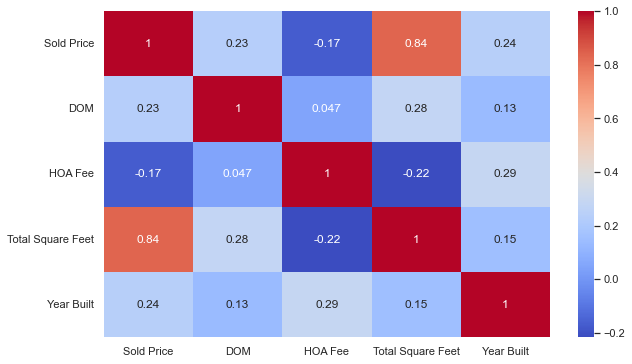

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

The above plot shows the correlations for the numeric features. It looks like Sold Price and Total Square Feet are strongly correlated. Everything is isnt very strong.

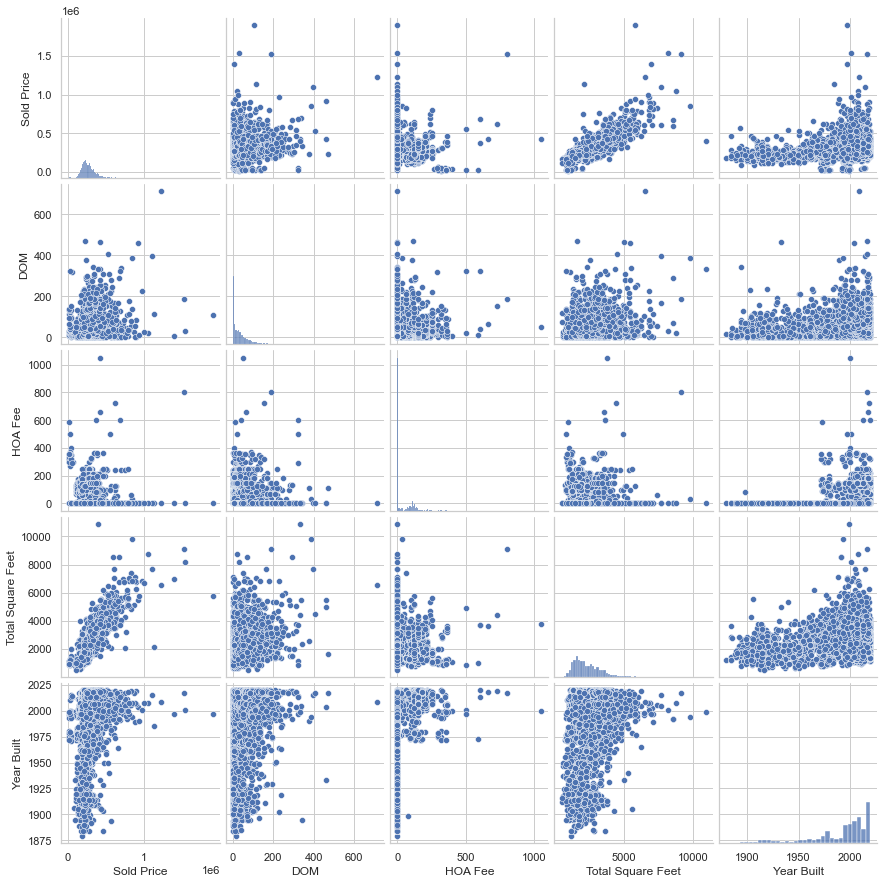

In [9]:
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

The above plot shows scatter plots and distributions for the different numeric features. We see basically the same thing we saw before. We also see that most of the variables, except for Year Built, are right skewed.

The following plots look at the target variable compared to other variables of interest.

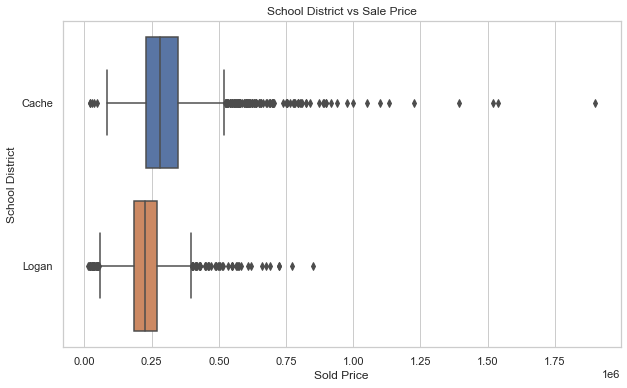

In [10]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Sold Price', y = 'School District', data = df)
plt.title('School District vs Sale Price')
plt.show()

The above plot shows boxplots for sale price for houses in the Cache School district and Logan school district. As can be seen, the Cache distribution varies more than the logan one. The higher priced housers also are found in the Cache school district.

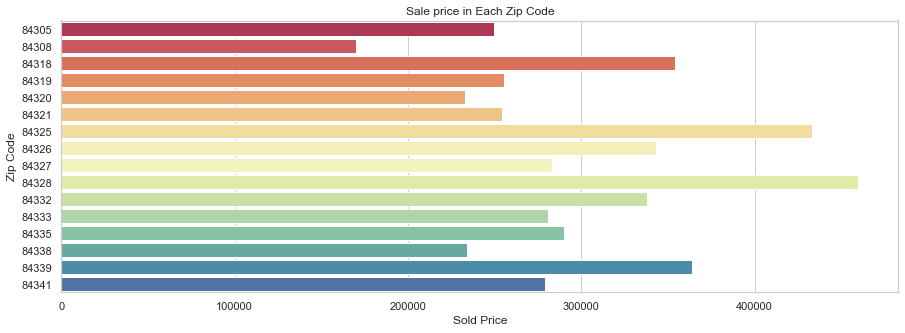

In [11]:
plt.figure(figsize = (15,5))

ax = sns.barplot(x = 'Sold Price', y = 'Zip', data = df, ci = None, palette = 'Spectral')
ax.set_xlabel('Sold Price')
ax.set_ylabel('Zip Code')
plt.title('Sale price in Each Zip Code')
plt.show()

The above plot shows barplots showing the price of houses in each zip code in Cache Valley. Here is a link to a website that matches the zip codes to the towns : https://www.bestplaces.net/find/zip.aspx?st=ut&county=49005.
It looks like houses outside of Logan city are usually higher priced. This is what we saw in the first plot as well. In fact, the bar plot for Logan (zip 84321) is one of the lower bars in the chart.

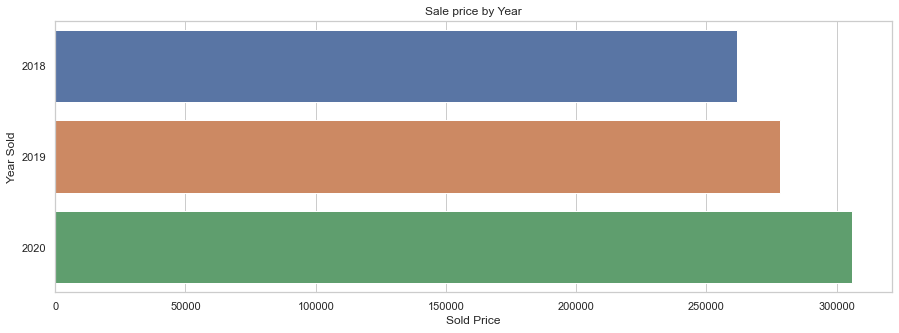

In [12]:
plt.figure(figsize = (15,5))

ax = sns.barplot(x = 'Sold Price', y = 'year_sold', data = df, ci = None)
ax.set_xlabel('Sold Price')
ax.set_ylabel('Year Sold')
plt.title('Sale price by Year')
plt.show()

The above plot is a barplot chart showing prices of houses the year they were sold. It looks like prices are rising as time goes on.

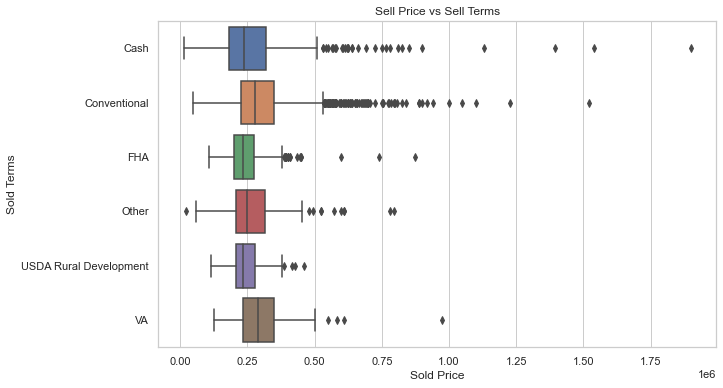

In [13]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Sold Price', y = 'Sold Terms', data = df)
plt.title('Sell Price vs Sell Terms')
plt.show()

The above plot shows a boxplot of sold terms compared to sell price. Conventional and cash methods have the highest variance. They also show that the more expensive houses are sold using conventional or cash methods. FHA, other, and VA have similar distributions and are on the lower side of sell prices. USDA Rural Development has the smallest distribution. Each distribution appears to be right skewed, which is to be expected with house prices.

From here, we will make the categorical features dummies.

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
df.head()

,Sold Price,DOM,HOA Fee,Total Square Feet,Year Built,Garage Capacity_1,Garage Capacity_2,Garage Capacity_3,Garage Capacity_4,Garage Capacity_5,...,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9,month_sold_10,month_sold_11,month_sold_12,built_after_2000_1
0,176000,5,0,1031,1974,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,225000,6,0,2091,1995,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,274900,14,0,2016,1980,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,175000,16,0,1920,1978,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,179000,29,0,1329,1976,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Question 2

1. Define the categorical variables and transform them into dummy variables (if you haven't done this already in Question 1).

Already done!

2. Scale all the variables using standardization. 

In [16]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

3. Define the feature space and target variables. Split the data into test (20%) and train set (80%) 

In [17]:
y = df_sc['Sold Price']
X = df_sc.drop('Sold Price', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

4. From sklearn.svm import the relevant function for SVM regression. Do the followings: 

In [18]:
from sklearn.svm import SVR

4.1 Train the regression model using its default inputs. 

In [19]:
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

4.2 Make predictions on the test set and save them as y_hat 

In [20]:
y_hat = SVM_regression.predict(X_test)

4.3 Construct a data frame named df_predictions with 2 columns. y_test, and y_hat  from previous part 

In [21]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
3940,0.830500,0.629943
2470,0.312895,0.339514
351,-0.620492,-0.457818
3137,-0.485575,-0.351862
2605,0.211071,0.298195


4.4 Visualize actual vs predicted prices in the test set using an scatterplot. Are you visually satisfied with the regression model? 

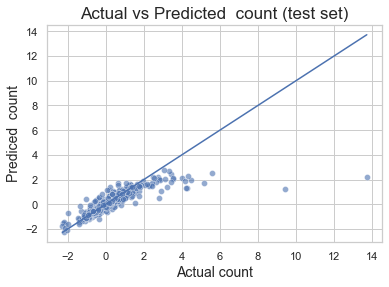

In [22]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

We're not very satisfied with this plot. The regression line seems to follow the data at the start, but the data is curved at the right end and the line does not show that. There are also some major outliers.

4.5 Report the R squared and the RMSE in the test set.

In [23]:
SVM_regression.score(X_test, y_test)

0.6513705735286015

In [24]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.65

5. Tuning the hyperparameters using gridsearchCV. I want you to specifically use the following param_grid. my_param_grid = {'C': [1,10,100], 'gamma': ['scaled',0.1,0.01], 'kernel': ['rbf']} 

In [25]:
my_param_grid = {'C': [1,10,100], 'gamma': ['scale',0.1,0.01], 'kernel': ['rbf']} 

from sklearn.model_selection import GridSearchCV

GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 , scoring=None)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [26]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [27]:
grid.best_estimator_

SVR(C=10, gamma=0.01)

6. Re-estimate  (Re-fit) the SVM regression model with the optimal parameters from the gridsearch method. Save the predictions as y_hat_optimized and add this column to the df_predictions data frame from part  4.3 in Question 2. 

In [28]:
y_hat_optimized = grid.predict(X_test)

predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
3940,0.830500,0.629943,0.623644
2470,0.312895,0.339514,0.340639
351,-0.620492,-0.457818,-0.517921
3137,-0.485575,-0.351862,-0.351870
2605,0.211071,0.298195,0.093739


7. Report the optimized R-squared and RMSE in the test set and compare them with the outputs from part 4.5 in Question 2. 

In [29]:
grid.score(X_test, y_test)

0.7119597612158779

In [30]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.59

8. Estimate the optimized RMSE_test using 5 fold cross validation.

In [31]:
from sklearn.model_selection import cross_val_score

NMSE = cross_val_score(estimator = SVR(C=10, gamma=0.01, kernel = 'rbf'), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.4938

### Question 2

1. Define a binary target variable liquid. liquid=1 if DOM< average(DOM) and 0 otherwise. What are the proportions of liquid listings vs illiquid ones in the data set? Is the target variable (relatively) balanced or (relatively) imbalanced? 

In [32]:
liquid = np.where(df['DOM']<np.mean(df['DOM']),1,0)

pd.crosstab(liquid,liquid, normalize='all')*100


col_0,0,1
row_0,,
0,34.355231,0.000000
1,0.000000,65.644769


This data set is a bit unbalanced, but not bad! It's better than some other datasets we've used.

In [33]:
df['liquid']=liquid
df.drop('DOM', axis=1, inplace=True)

2. Along with the target variable, define your feature space (X) and split the data into test (20%) and train set (80%)

In [34]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc['liquid']=df['liquid']

y = df_sc['liquid']
X = df_sc.drop('liquid', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

3. From sklearn.svm import the relevant function for SVM classification. Do the followings:

In [35]:
from sklearn.svm import SVC

3.1 Train the SVM classification model using its default inputs. 

In [36]:
SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

SVC()

3.2 Make classifications on the test set and save them as y_hat

In [37]:
y_hat = SVM_classification.predict(X_test)

3.3 Construct a data frame named df_classifications with 2 columns. y_test, and y_hat  from previous part 

In [38]:
df_classifications = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
df_classifications.head()

,y_test,y_hat
3940,0,0
2470,1,1
351,1,1
3137,1,0
2605,0,1


3.4 Borrow my_SVM_report() function from the python notebook of the SVM lecture. Report the Accuracy, precision, recall and f1 score along with the confusion matrix. Interpret all of these statistics. Do you trust the accuracy of the model? why?

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_SVM_report(X_train, y_train, X_test,y_test, C=1,gamma='scale' ,kernel='rbf', class_weight=None):
    svc= SVC(C=C, gamma=gamma, kernel=kernel, class_weight=class_weight)
    svc.fit(X_train, y_train)
    y_hat = svc.predict(X_test)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    mcc     = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(mcc))
    print("-----------------------------------------")
    return cm_labled

In [40]:
my_SVM_report(X_train, y_train, X_test,y_test, kernel='rbf')

-----------------------------------------
Accuracy  = 0.6618
Error_rate  = 0.3382
Precision = 0.68
Recall    = 0.9
f1_score  = 0.77
MCC       = 0.17
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,67,224
Actual : positive,54,477


The accuracy is .66. This reports overall how well the model is doing. This accuracy is okay, but not the best. Precision is the quality of positive predicitons in our model. Our model has a precision of .68, which means its quality is alright. Recall measures how well our model predicts positives that are actually positive. For our model we have a value of .9, which means its pretty good. F1 uses both recall and precision. Our f1 score is .77, which is pretty good. Because of this pretty good f1 score, we would say we trust the accuracy enough. There are a lot of false positives which is concerning, and makes us hesitant to trust the accuracy.

3.5 Can you plot the ROC curve and report the AUC score in SVM classification? why? 

You cannot. ROC curves require proability values and SVM classification has no probability values associated with it.

4. Tuning the hyperparameters using gridsearchCV. I want you to specifically use the following param_grid. my_param_grid = {'C': [1,100,1000], 'gamma': ['scaled',0.01,0.001], 'kernel': ['rbf']}

In [41]:
my_param_grid = {'C': [10,100,1000], 'gamma': ['scale',0.01,0.001], 'kernel': ['rbf']} 

GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

from sklearn.metrics import make_scorer, f1_score
f1 = make_scorer(f1_score)

grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 , scoring=f1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END ......................C=10, gamma=0.001,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring=make_scorer(f1_score), verbose=2)

5. Re-estimate  (Re-fit) the SVM classification model with the optimal parameters from the gridsearch method. Save the predictions as y_hat_optimized and add this column to the df_classifications data frame from part  3.3 in Question 3. 

In [42]:
grid.best_estimator_

SVC(C=10, gamma=0.001)

In [43]:
y_hat_optimized = grid.predict(X_test)
df_classifications['y_hat_optimized'] = y_hat_optimized
df_classifications.head()

,y_test,y_hat,y_hat_optimized
3940,0,0,1
2470,1,1,1
351,1,1,1
3137,1,0,1
2605,0,1,0


6. Report the optimized classification metrics using my_SVM_report() function and compare them with the outputs from part 3.4 in Question3. 

In [44]:
my_SVM_report(X_train, y_train, X_test,y_test,C=10, gamma=0.001)

-----------------------------------------
Accuracy  = 0.6338
Error_rate  = 0.3662
Precision = 0.65
Recall    = 0.92
f1_score  = 0.76
MCC       = 0.06
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,34,257
Actual : positive,44,487


7. Estimate the optimized accuracy_test using 5 fold cross validation.

In [45]:
accuracy = cross_val_score(estimator = SVC(C=1000, gamma=0.001), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

accuracy_CV=round(accuracy.mean(),4)
accuracy_CV

0.6618

8. Why do you think Jeff is interested in predicting the liquidity premium (either positive or negative) of the houses? There may be multiple correct answers to this question. Just list whatever reason seems appropriate to you.

The liquidity premium is any form of additional compensation that would encourage investors to buy assets that are not usually easy to convert back into cash. Houses are exactly that kind of asset. Liquidity premiums are very closely related to interest rates, so Jeff may be trying to predict liquidity premiums in an attempt to also predict interest rates.